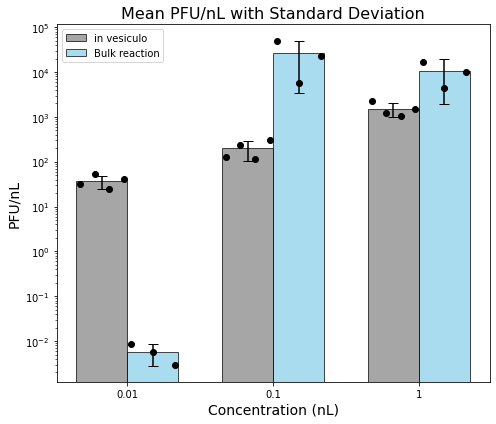

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
concentrations = ["0.01", "0.1", "1"]
mean_ves = [37, 198, 1497]
std_ves = [12, 93, 505]
mean_bulk = [5.71e-3, 2.60e4, 1.06e4]
std_bulk = [2.86e-3, 2.25e4, 8.65e3]

# Individual data points (4 replicates for vesicles, 3 for bulk)
data_ves = [
    [32.1, 52.5, 24.2, 41.2],
    [128.0, 236.0, 117.0, 312.0],
    [2210.0, 1230.0, 1070.0, 1490.0]
]
data_bulk = [
    [8.57e-3, 5.71e-3, 2.86e-3],
    [50200, 5580, 22300],
    [16700, 4460, 10000]
]

# Bar plot positions
x = np.arange(len(concentrations))
width = 0.35  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))

# Plot bars with error bars
bar_ves = ax.bar(x - width/2, mean_ves, width, yerr=std_ves, label="in vesiculo", color="gray", capsize=5, alpha=0.7, edgecolor='black')
bar_bulk = ax.bar(x + width/2, mean_bulk, width, yerr=std_bulk, label="Bulk reaction", color="skyblue", capsize=5, alpha=0.7, edgecolor='black')

# Add individual data points
for i, (ves, bulk) in enumerate(zip(data_ves, data_bulk)):
    # Scatter individual points for vesicles (shifted left on the bar)
    jitter_ves = np.linspace(-0.15, 0.15, len(ves))
    ax.scatter([x[i] - width/2 + j for j in jitter_ves], ves, color="black", zorder=3)
    
    # Scatter individual points for bulk (shifted right on the bar)
    jitter_bulk = np.linspace(-0.15, 0.15, len(bulk))
    ax.scatter([x[i] + width/2 + j for j in jitter_bulk], bulk, color="black", zorder=3)

# Set logarithmic scale for the y-axis
ax.set_yscale("log")

# Labels and title
ax.set_xlabel("Concentration (nL)", fontsize=14)
ax.set_ylabel("PFU/nL", fontsize=14)
ax.set_title("Mean PFU/nL with Standard Deviation", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(concentrations)
ax.legend()
#plt.savefig("Fig bulk-vs-ves.svg", format='svg')

# Gridlines
#ax.grid(visible=True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
#plt.savefig("Fig bulk-vs-ves.svg", format='svg')
plt.show()
